In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Data and Graphs
First step is to examine the data set for trends based on each variable and find any correlations between variables. 
  
Let's start with 

In [3]:
#read the data into variable stats_19
stats_19 =pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/PFI_2019.csv')
print(stats_19.shape)
stats_19.head(5)
#list(stats_19.columns)

(15500, 75)


,BASMID,ALLGRADEX,EDCPUB,SCCHOICE,SPUBCHOIX,SCONSIDR,SCHLHRSWK,EINTNET,MOSTIMPT,INTNUM,...,SEFUTUREX,DSBLTY,HHPARN19X,HHPARN19_BRD,NUMSIBSX,PARGRADEX,RACEETH,INTACC,CENREG,ZIPLOCL
0,20191000012,12,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,3,4,1,4,11
1,20191000029,4,1,2,3,2,4,3,-1,2,...,6,2,2,2,1,3,3,1,4,12
2,20191000059,11,2,2,2,1,4,3,2,2,...,5,2,2,2,1,5,2,3,2,11
3,20191000070,6,1,1,1,1,4,4,-1,-1,...,6,2,2,2,1,2,3,1,2,31
4,20191000078,9,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,5,5,1,2,21


Objective variables of interest for first analysis:
- ALLGRADEX : current grade/year of school
- SPUBCHOIX : does your public school district let you choose which public school you want this child to attend?
- SCHLHRSWK : about how many hours does this child attend a school each week?
- EINTNET : is this child enrolled in any online, virtual, or cyber courses?
- INTNUM : How many online, virtual, or cyber courses does this child take? 
- SEGRADES : What grades does this child get?
- SEABSNT : How many days has this child been absent from school?
- CDOBMM - what month was this child born?
- CDOBYY - what year was this child born?
- CSEX - childs gender identity
- CSPEAKX - language spoken at home
- HHTOTALXX - how many people live in this house?
- RELATION - how are you related to the child?
- P1REL - relation of first parent to child
- P1SEX - is this parent male or female?
- P1MRSTA - parents current marital status
- P1EMPL - parents employment status
- P1HRSWK - how many hours does this parent work for pay or income? 
- P1MTHS - in the past 12 months how many has the parent worked?
- P1AGE - how old is this parent or guardian?
- P2GUARD - is there a second parent or gaurdian living in this household? 
- TTLHHINC - total income of all persons in household in past 12 months
- OWNRNTHB - housing status (renting/own)
- CHLDNT - how often does child use internet at home for learning?
- DSBLTY : child currently has diability
- NUMSIBSX : number of the child's siblings
- PARGRADEX : parent or guardian highest education
- RACEETH : Race and ethnicity of the child
- INTACC : household has internet access
- CENREG : census region where the child lives
- ZIPLOCL : zip code classifications by community type

Subjective variables of interest:
- SCCHOICE : did you feel you had a choice in what school this child attends
- SCONSIDR : did you consider other schools for this child?
- MOSTIMPT : of the reasons that this child is enrolled in online, virtual, or cyber courses, which one would you say is the most important to you? 
- SEENJOY : how much do you agree or disagree with the following statement: "This child enjoys school"
- SEGRADEQ : how would you describe his or her work at school
- HDHEALTH : how would you describe this child's health? 
- SEFUTUREX : how far do you expect this child to go in his or her education?

### A. Introduce the dataset. Who, what, where, and why was this data generated?
  
Who: 
- students who are enrolled in kidergarten through grade 12
- Parents are the ones who answer the quetiosn though
- conducted by the US Census Bureau 2019 (curated data) for the NHES (National Household Education Survery)

What:
- Data colleceted from the PFI topic
- 

Where:
- The United States: 
- Northeast: 2653
- South: 5639
- Midwest: 3528
- West: 3680


Why:
- The PFI focuses on parent involvment in education from kindergarten to highschool
- The survey helps to include students who are not enrolled in regular education
- Data are used to provide national estimates on populations of interest in education researchers and policy makers. 
- Targets populations of interest using specific screening and sampling procedures 

In [54]:
# Helpful functions:
def get_counts(length, data):
    counts = [0]*length
    for i in range(1,length+1):
        counts[i-1] = list(data).count(i)
    return counts

def get_proportion(counts):
    return [round(x / sum(counts), 3) for x in counts]

Text(0, 0.5, 'Number of Children')

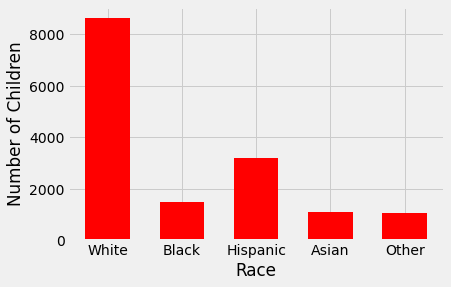

In [19]:
# Racial Spread of participants:

raceeth = stats_19['RACEETH']
races = ['White','Black','Hispanic', 'Asian', 'Other']
race_counts = get_counts(5, raceeth)
x_pos = [1,1.5,2,2.5,3]
plt.bar(x_pos, race_counts, width = 0.3, color ='red')
plt.xticks(x_pos, races)
plt.xlabel('Race')
plt.ylabel('Number of Children')
#plt.title('Race Distribution of Children Surveyed')

## B. Characteristics of sample. Describe the sample of students and families in the dataset. Summarize the distribution of one of the characteristics of the parents and households. Some interesting variables you may consider include: marital status, employment, age, income, own/rent etc. Graphs or tables of student and family characteristics may help here.
- Parents range from ages 15 to 90
- Children range from ages 4 to 21
- There are more older kids in the survey by a little
- Majority of people who participated in the survey have income over 50,000
- Majority of parents are highschool graduates and a good amount of those are college graduates


[614, 794, 1065, 1112, 1012, 969, 1350, 2196, 2834, 1541, 733, 1280]
7750.0


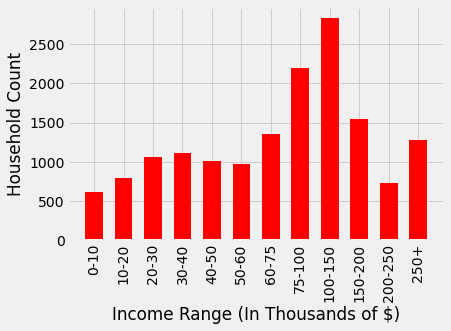

In [12]:
# Income of households range
ttlhhinc = stats_19['TTLHHINC']
#List income ranges in thousands
income_ranges = ['0-10', '10-20', '20-30','30-40','40-50','50-60','60-75','75-100','100-150','150-200','200-250','250+']
income_counts = [0]*12
for i in range(1,13):
    income_counts[i-1] = list(ttlhhinc).count(i)
print(income_counts)

x_pos = list(np.arange(1,7,0.5))
plt.bar(x_pos, income_counts, width = 0.3, color ='red')
plt.xticks(x_pos, income_ranges, rotation = 90)
plt.xlabel('Income Range (In Thousands of $)')
plt.ylabel('Household Count')
print(np.sum(income_counts)/2)

In [ ]:
# Languages spoken at home:
cspeakx = stats_19['CSPEAKX']
plt.hist(cspeakx)
plt.grid()

### C. Relationships in the sample. Check the relationship between two of the student characteristics (most of the fields: race, sex, grade level (ALLGRADEX) language spoken...) and at least two of the following: school grades (SEGRADES), whether students are in public (EDCPUB), and student disability (DSBLTY). For example, do you find evidence that students in public/private schools, or disabled / not disabled status have higher grades? Here we are looking for at least four comparisons between pairs of student characteristics. There may be no convincing associations for many pairs of relationships, and finding no apparent relationships in the data is acceptable.
  
- sex (CSEX), number of siblings (NUMSIBSX) (1,2, or 3+)
- school grades (SEGRADES), and public/private (EDCPUB)

[3431, 2519, 882, 170] 7002
[4188, 1853, 412, 78] 6531


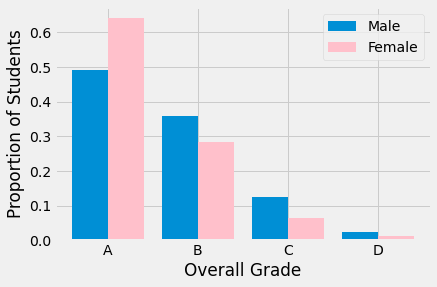

In [147]:
# Comparison between sex and grades (proportions)
male_grade_counts = get_counts(4, grades_data[grades_data['CSEX']==1]['SEGRADES'])
female_grade_counts = get_counts(4, grades_data[grades_data['CSEX']==2]['SEGRADES'])
print(male_grade_counts, sum(male_grade_counts))
male_grade_proportions = get_proportion(male_grade_counts)
print(female_grade_counts, sum(female_grade_counts))
female_grade_proportions = get_proportion(female_grade_counts)
X_labels = ['A','B','C','D'] 
X_axis = np.arange(1,5)

plt.bar(X_axis-0.2, male_grade_proportions, 0.4, label = 'Male')
plt.bar(X_axis+0.2, female_grade_proportions, 0.4, label = 'Female', color = 'pink')
plt.ylabel('Proportion of Students')
plt.xlabel('Overall Grade')
plt.xticks(X_axis, X_labels)
plt.legend()

[7177, 878] 8055
[6605, 840] 7445


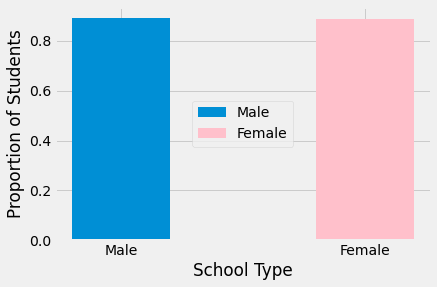

In [114]:
# Comparison between sex and school type:
male_school_counts = get_counts(2, stats_19[stats_19['CSEX']==1]['EDCPUB'])
female_school_counts = get_counts(2, stats_19[stats_19['CSEX']==2]['EDCPUB'])
print(male_school_counts, sum(male_school_counts))
print(female_school_counts, sum(female_school_counts))
male_school_proportions = get_proportion(male_school_counts)
female_school_proportions = get_proportion(female_school_counts)

X_labels = ['Male','Female'] 
X_axis = np.arange(1, 2, 0.5)

plt.bar(X_axis[0], male_school_proportions, 0.2, label = 'Male')
plt.bar(X_axis[1], female_school_proportions, 0.2, label = 'Female', color = 'pink')
plt.ylabel('Proportion of Students')
plt.xlabel('School Type')
plt.xticks(X_axis, X_labels)
plt.legend(loc = 'center')

[2132, 1453, 498, 105] 4188
[3548, 1822, 469, 84] 5923
[1426, 783, 229, 42] 2480
[513, 314, 98, 17] 942


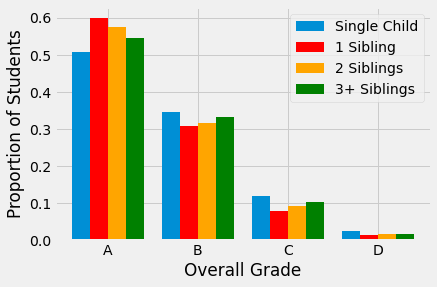

In [112]:
# Comparison between siblings and grades:
no_sib = get_counts(4, grades_data[grades_data['NUMSIBSX']==0]['SEGRADES'])
one_sib = get_counts(4, grades_data[grades_data['NUMSIBSX']==1]['SEGRADES'])
two_sib = get_counts(4, grades_data[grades_data['NUMSIBSX']==2]['SEGRADES'])
three_or_more_sib = get_counts(4, grades_data[grades_data['NUMSIBSX']>=3]['SEGRADES'])
print(no_sib, sum(no_sib))
print(one_sib, sum(one_sib))
print(two_sib, sum(two_sib))
print(three_or_more_sib, sum(three_or_more_sib))
no_sib_proportion = get_proportion(no_sib)
one_sib_proportion = get_proportion(one_sib)
two_sib_proportion = get_proportion(two_sib)
three_or_more_sib_proportion = get_proportion(three_or_more_sib)

X_labels = ['A','B','C','D'] 
X_axis = np.arange(1,5)

plt.bar(X_axis-0.3, no_sib_proportion, 0.2, label = 'Single Child')
plt.bar(X_axis-0.1, one_sib_proportion, 0.2, label = '1 Sibling', color = 'red')
plt.bar(X_axis+0.1, two_sib_proportion, 0.2, label = '2 Siblings', color = 'orange')
plt.bar(X_axis+0.3, three_or_more_sib_proportion, 0.2, label = '3+ Siblings', color = 'green')
plt.ylabel('Proportion of Students')
plt.xlabel('Overall Grade')
plt.xticks(X_axis, X_labels)
plt.legend()

[0.884, 0.896, 0.886, 0.874]


([<matplotlib.axis.XTick at 0x1dcdd2d95e0>,
 [Text(1, 0, '0'), Text(2, 0, '1'), Text(3, 0, '2'), Text(4, 0, '3+')])

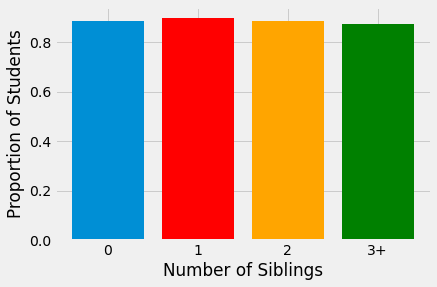

In [82]:
# Comparison between number of siblings and school type:
no_sib = get_counts(2, stats_19[stats_19['NUMSIBSX']==0]['EDCPUB'])
one_sib = get_counts(2, stats_19[stats_19['NUMSIBSX']==1]['EDCPUB'])
two_sib = get_counts(2, stats_19[stats_19['NUMSIBSX']==2]['EDCPUB'])
three_or_more_sib = get_counts(2, stats_19[stats_19['NUMSIBSX']>=3]['EDCPUB'])

no_sib_proportion = get_proportion(no_sib)
one_sib_proportion = get_proportion(one_sib)
two_sib_proportion = get_proportion(two_sib)
three_or_more_sib_proportion = get_proportion(three_or_more_sib)

sib_proportions = [no_sib_proportion[0],one_sib_proportion[0],two_sib_proportion[0],three_or_more_sib_proportion[0]]
print(sib_proportions)
X_labels = ['0','1','2','3+']
X_axis = np.arange(1,5)

#plt.bar(X_axis, sib_proportions)

plt.bar(X_axis[0], no_sib_proportion[0])
plt.bar(X_axis[1], one_sib_proportion[0], label = '1 Sibling', color='red')
plt.bar(X_axis[2], two_sib_proportion[0], label = '2 Siblings', color='orange')
plt.bar(X_axis[3], three_or_more_sib_proportion[0], label = '3+ Siblings', color = 'green')

plt.ylabel('Proportion of Students')
plt.xlabel('Number of Siblings')
plt.xticks(X_axis, X_labels)

### D. Relationships with outcome variables. The family involvement variables are the ones starting with FO, and variables that measure student success include measure SEENJOY, SEGRADES, and possibly SEGRADEQ and SEABSNT. Choose a variable to measure success and check the degree to which variables in family involvement seem to affect success.
  
- choose segradeq as variable to measure student success
- seperate bars for each quality of schoolwork being done
- on each graph there should be each FO categories on x-axis
- only put bars for successes (failure is implied)
- do proportions instead of counts because there are an uneven number of students for each grade


In [142]:
# yes or no FO data only (excludes FODINNERX, FOLIBRAYX, FOBOOKSTX)
specific_data = stats_19[['SEGRADEQ','FOSTORY2X','FOCRAFTS','FOGAMES','FOBUILDX','FOSPORT',\
                         'FORESPON', 'FOHISTX']]
col_titles = list(specific_data.columns)

num_A = list(specific_data['SEGRADEQ']).count(1)
num_B = list(specific_data['SEGRADEQ']).count(2)
num_C = list(specific_data['SEGRADEQ']).count(3)
num_D = list(specific_data['SEGRADEQ']).count(4)
num_E = list(specific_data['SEGRADEQ']).count(5)
print(num_A, num_B, num_C, num_D, num_E)

################################### A_grade:
A_grade = specific_data[specific_data['SEGRADEQ']==1]
#get counts for data (1:yes, 2:no)
A_counts = []
for i in col_titles:
    A_counts.append(list(A_grade[i]).count(1))
A_counts.pop(0)
A_proportions = [np.round(x/num_A,3) for x in A_counts]
# pos_per_col is a list containing number of successes in each column
print("A Grade Data: ", A_proportions)

################################### B_grade:
B_grade = specific_data[specific_data['SEGRADEQ']==2]
B_counts = []
for i in col_titles:
    B_counts.append(list(B_grade[i]).count(1))
B_counts.pop(0)
B_proportions = [np.round(x/num_B,3) for x in B_counts]
print("B Grade Data: ", B_proportions)

################################### C_grade:
C_grade = specific_data[specific_data['SEGRADEQ']==3]
C_counts = []
for i in col_titles:
    C_counts.append(list(C_grade[i]).count(1))
C_counts.pop(0)
C_proportions = [np.round(x/num_C,3) for x in C_counts]
print("C Grade Data: ", C_proportions)

################################### D_grade:
D_grade = specific_data[specific_data['SEGRADEQ']==4]
D_counts = []
for i in col_titles:
    D_counts.append(list(D_grade[i]).count(1))
D_counts.pop(0)
D_proportions = [np.round(x/num_D, 3) for x in D_counts]
print("D Grade Data: ", D_proportions)

################################### E_grade:
E_grade = specific_data[specific_data['SEGRADEQ']==5]
E_counts = []
for i in col_titles:
    E_counts.append(list(E_grade[i]).count(1))
E_counts.pop(0)
E_proportions = get_proportion(E_counts)
print("E Grade Data: ", E_proportions)

5234 5209 4330 649 76
A Grade Data:  [0.625, 0.475, 0.59, 0.576, 0.726, 0.701, 0.576]
B Grade Data:  [0.606, 0.431, 0.537, 0.55, 0.677, 0.709, 0.53]
C Grade Data:  [0.553, 0.418, 0.489, 0.518, 0.639, 0.698, 0.515]
D Grade Data:  [0.541, 0.391, 0.453, 0.512, 0.555, 0.726, 0.478]
E Grade Data:  [0.136, 0.097, 0.122, 0.129, 0.147, 0.219, 0.151]


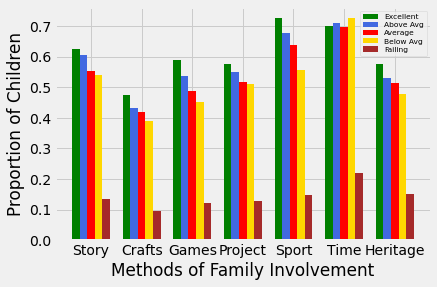

In [141]:
###### Charts for data above:
metadata = [A_counts, B_counts, C_counts, D_counts]
X = ['Story','Crafts','Games','Project','Sport','Time', 'Heritage']

X_axis = np.arange(len(X))
plt.bar(X_axis-0.3, A_proportions, 0.15, label = 'Excellent', color = 'green')
plt.bar(X_axis-0.15, B_proportions, 0.15, label = 'Above Avg', color = 'royalblue')
plt.bar(X_axis, C_proportions, 0.15, label = 'Average', color = 'red')
plt.bar(X_axis+0.15, D_proportions, 0.15, label = 'Below Avg', color = 'gold')
plt.bar(X_axis+0.3, E_proportions, 0.15, label = 'Failing', color = 'brown')

plt.xticks(X_axis, X)
plt.xlabel('Methods of Family Involvement')
plt.ylabel('Proportion of Children')
#plt.title('Activities Parents do with Their Children')
plt.legend(loc = "best", labelspacing = 0.25, fontsize = 7.5)

### E. Provide context What do the relationships you discovered imply? What are some questions about parental involvement in education that you would like to answer but are unable to with the current data set alone? What data would you need to be able to answer them?

### F. Conclusion What did you learn from exploring this dataset?
